In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
file_path = 'Resources/clean_data.csv'
clean_data = pd.read_csv(file_path)
clean_data.head()

,Unnamed: 0,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,...,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Age,Firearm Used Flag,Location
0,0,180067842,09/02/2018,18:15,09/02/2018,18:15,NaN,NaN,501,220,...,PJ2783,EPD,U,1,VIC,U,U,0.0,N,3400 NORTON AV\nKANSAS CITY 64130
1,1,180007664,01/31/2018,17:22,01/31/2018,13:30,01/31/2018,15:45,1001,250,...,PJ3255,CPD,U,2,VIC,U,U,0.0,N,4000 MILL ST\nKANSAS CITY 54111
2,2,180007431,01/30/2018,19:00,05/14/2017,12:00,01/30/2018,19:00,1750,11D,...,PJ3505,EPD,Y,1,VIC,W,F,0.0,N,4300 PROSPECT AV\nKANSAS CITY 64130\n(39.04820...
3,3,180007426,01/30/2018,17:41,01/29/2018,00:01,01/30/2018,17:41,501,220,...,PJ5421,MPD,U,1,VIC,B,M,66.0,N,7100 HIGHLAND AV\nKANSAS CITY 64134\n(38.99823...
4,4,180094471,12/08/2018,13:00,12/08/2018,13:00,NaN,NaN,1401,290,...,PJ3350,EPD,U,1,SUS,B,M,0.0,N,2500 E 42 ST\nKANSAS CITY 64133


In [40]:
new_data = clean_data.filter(['Description','Area','Invl_No'], axis = 1)
new_data.head()

,Description,Area,Invl_No
0,Burglary - Residence,EPD,1
1,Forgery,CPD,2
2,Sex Off Fondle - mol,EPD,1
3,Burglary - Residence,MPD,1
4,Property Damage,EPD,1


In [41]:
data = new_data.groupby(['Description','Area']).count()
data = data.reset_index()
data.head()

,Description,Area,Invl_No
0,AGG ASSAULT,EPD,2
1,Accidental Drug Over,EPD,2
2,Accidental Drug Over,SCP,1
3,Agg Assault,EPD,8
4,Agg Assault - Domest,CPD,468


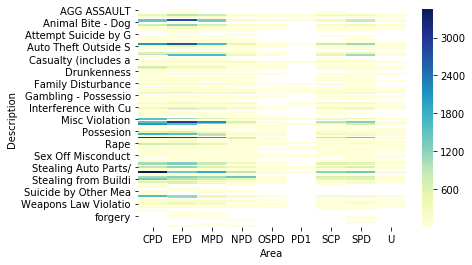

In [42]:
#data = pd.DataFrame(data={'Description':x, 'Zip Code':y, 'Invl_No':z})
#data = data.pivot(index='x', columns='y', values='z')
#sns.heatmap(data)
#plt.show()

heatmap_data = pd.pivot_table(data,values='Invl_No',index = ['Description'], columns = 'Area')
sns.heatmap(heatmap_data, cmap="YlGnBu")